In [1]:
from google.colab import files
uploaded = files.upload()

Saving Data_Processed_raw.xlsx to Data_Processed_raw.xlsx


Import python packages 

Import data 

In [2]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

# Import data
dm = pd.read_excel('Data_Processed_raw.xlsx')

Check the number of missing data

In [3]:
dm.isnull().sum()

Unnamed: 0          0
Age Group           0
PatientAge          0
Sex                 0
PatientSex          0
                   ..
Sepsis              0
ED_Disposition      0
Hosp_Disposition    0
Survivors           0
Deceased            0
Length: 61, dtype: int64

Describe the data

In [4]:
dm.describe()

,Unnamed: 0,PatientAge,Sex,EDLOS,EDLengthofStayInHrs,EDLengthofStayInMins,ESI_x,Respiratory Therapist,Physician Assistant,Resident,ED Tech,Physician Available,Nurse Available,COVID_PL_OR_POSITIVE_TEST,Bed Available,Systolic_BP,Diastolic_BP,HR,Temp,RR,SpO2,ON_ANTHYPERT,HAS_ABDOM_AORTIC_ANEURYSM_YN,HAS_AFIB,HAS_ALCOHOLISM,HAS_ANEMIA,HAS_ASTHMA,HAS_BREAST_CANCER,HAS_CAD,HAS_CHF,HAS_CHRONIC_HEART_DISEASE,HAS_CHRONIC_LIVER_DISEASE,HAS_CHRONIC_LUNG_DISEASE,HAS_CKD,HAS_COPD,HAS_CVD,HAS_DIABETES,HAS_TYPE_2_DIABETES,HAS_HYPERTENSION,HAS_HEMOGLOBINOPATHIES,HAS_NON_CAD_ATHERO,HAS_PERIPH_VASC_DIS,HAD_HEART_ATTACK,HAS_OBESITY,Sepsis,Survivors,Deceased
count,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3291.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3301.000000,3265.000000,3301.000000,3299.000000,3299.000000,3296.000000,3187.000000,3297.000000,3272.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3190.000000,3301.00000,3301.000000,3301.000000
mean,1650.000000,49.863375,0.350803,0.652227,6.782096,406.925780,2.289274,0.002424,0.033626,0.044229,0.003029,0.892154,0.287489,0.990505,0.964253,135.129130,81.371931,94.532160,98.500094,19.271459,97.593521,0.641693,0.002821,0.052038,0.174295,0.270533,0.284013,0.005956,0.044828,0.214420,0.216614,0.062696,0.516614,0.168966,0.231975,0.505643,0.176176,0.176489,0.660815,0.001567,0.000627,0.026959,0.005956,0.480564,0.01242,0.988185,0.011815
std,953.060946,15.023652,0.477294,0.476336,5.956798,357.407896,0.529555,0.049177,0.180292,0.205635,0.054965,0.310233,0.452660,0.096992,0.185686,20.588867,14.744012,15.790055,2.156240,3.885265,3.744654,0.479578,0.053049,0.222138,0.379422,0.444305,0.451014,0.076958,0.206958,0.410484,0.412002,0.242453,0.499802,0.374780,0.422159,0.500047,0.381029,0.381295,0.473507,0.039566,0.025035,0.161990,0.076958,0.499700,0.11077,0.108067,0.108067
min,0.000000,18.000000,0.000000,0.000000,0.366667,22.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,41.000000,29.000000,32.000000,37.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,825.000000,40.000000,0.000000,0.000000,3.316667,199.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,121.000000,72.000000,85.000000,98.000000,18.000000,97.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
50%,1650.000000,51.000000,0.000000,1.000000,5.216667,313.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,134.000000,81.000000,94.000000,98.400000,18.000000,98.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,2475.000000,57.000000,1.000000,1.000000,8.683333,521.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,146.000000,91.000000,104.000000,98.800000,20.000000,100.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,1.000000,0.000000
max,3300.000000,100.000000,1.000000,1.000000,49.266667,2956.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,267.000000,

Histogram to visualize data

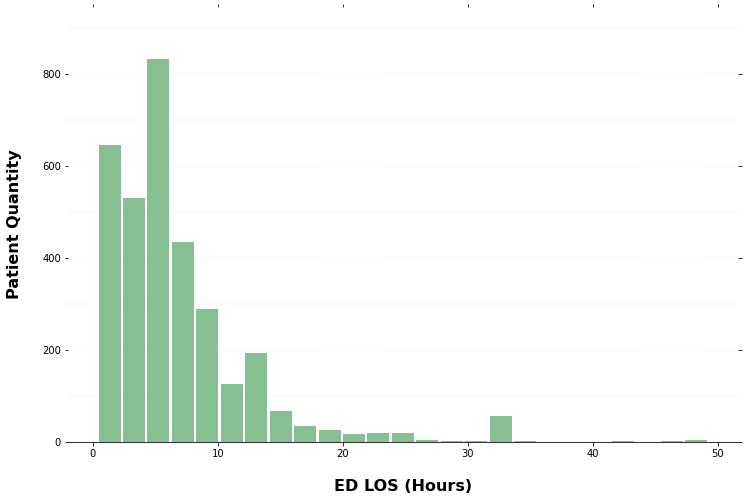

In [5]:
from matplotlib.ticker import StrMethodFormatter
ax = dm.hist(column='EDLengthofStayInHrs', bins=25, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("ED LOS (Hours)", labelpad=20, weight='bold', size=16)

    # Set y-axis label
    x.set_ylabel("Patient Quantity", labelpad=20, weight='bold', size=16)

    # Format y-axis label
    x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))


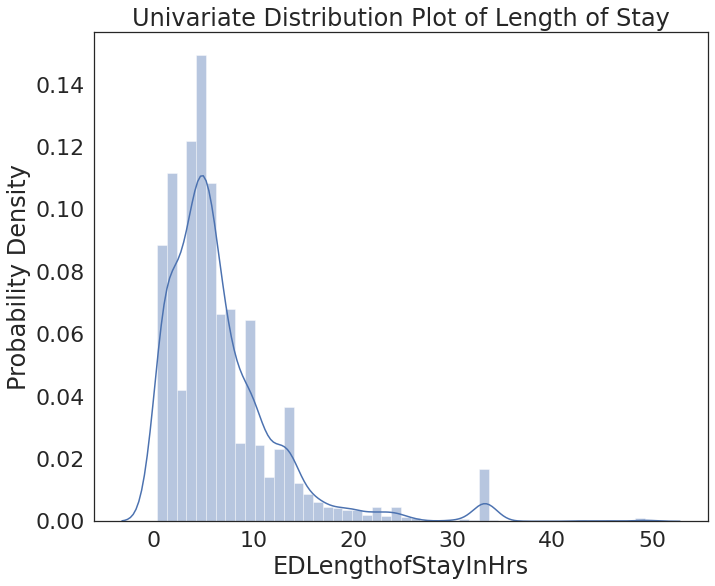

In [6]:
# Univariate distribution plot
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(11, 9))
sns.distplot(dm['EDLengthofStayInHrs'], norm_hist=False);
plt.ylabel('Probability Density')
plt.title('Univariate Distribution Plot of Length of Stay')
plt.show()

In [7]:
# Shapiro-Wilk Test to check for normality
from numpy.random import seed
from numpy.random import randn
from scipy.stats import shapiro
# seed the random number generator
# seed(1)
# generate univariate observations
data = dm['EDLengthofStayInHrs']
# normality test
stat, p = shapiro(data)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=0.780, p=0.000
Sample does not look Gaussian (reject H0)


In [ ]:
# Check if COVID-19 Patient LOS varies with Age

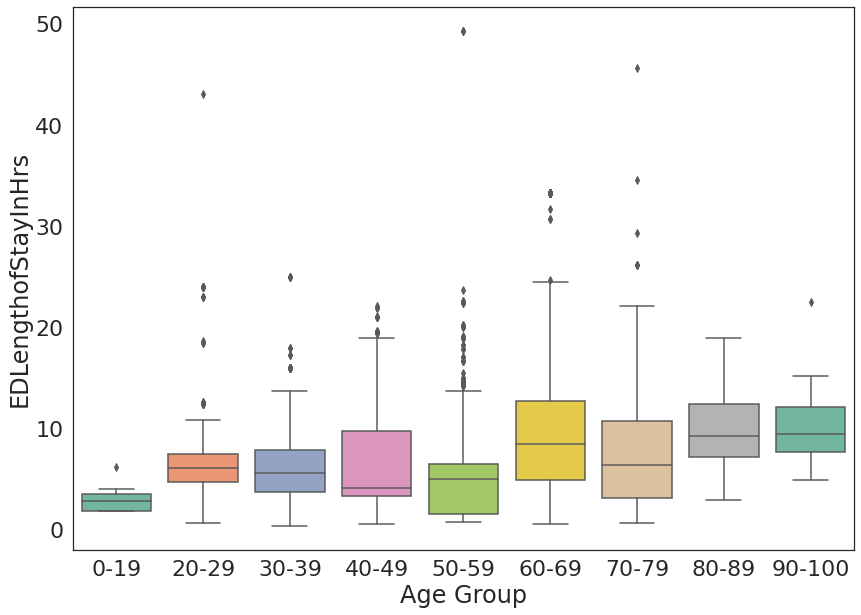

In [8]:
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(14, 10))
ax = sns.boxplot(x="Age Group", y="EDLengthofStayInHrs", order=['0-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-100'], 
                 palette="Set2", data=dm)

In [ ]:
# Which COVID-19 Patient Complaints have the longest ED LOS

In [ ]:
f, ax = plt.subplots(figsize=(18, 12))
ax = sns.barplot(x="EDLengthofStayInHrs", y="PrimaryChiefComplaint", data=dm)

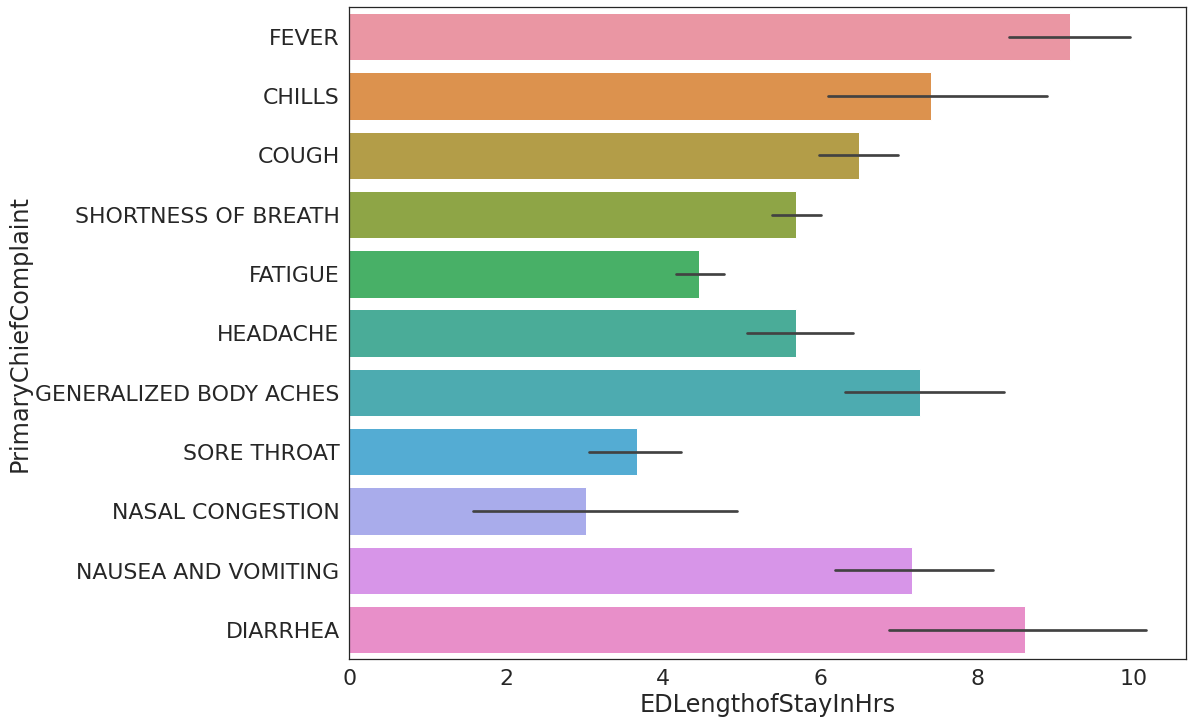

In [10]:
# Closer look with the most common symptoms as specified by CDC and seen as Primary Complaints by COVID-19 ED Patients
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(15, 12))
ax = sns.barplot(x="EDLengthofStayInHrs", y="PrimaryChiefComplaint", order=['FEVER', 'CHILLS', 'COUGH', 'SHORTNESS OF BREATH',
                                                                           'FATIGUE', 'HEADACHE', 'GENERALIZED BODY ACHES',
                                                                           'SORE THROAT', 'NASAL CONGESTION', 'NAUSEA AND VOMITING',
                                                                           'DIARRHEA'], data=dm)

In [ ]:
# COVID-19 ED Patient LOS vary with Race

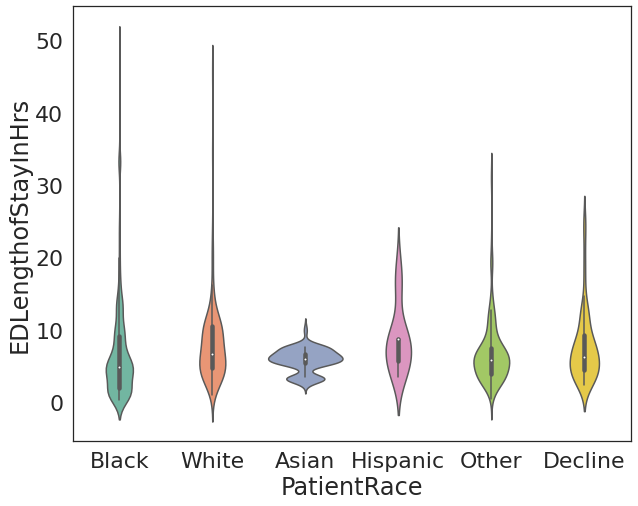

In [11]:
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.violinplot(data=dm, x="PatientRace", y="EDLengthofStayInHrs", order=['Black','White','Asian','Hispanic',
                                                                           'Other','Decline'],
                 orient="v", palette="Set2")

In [ ]:
# How does ED LOS vary with COVID-19 patient payment types?

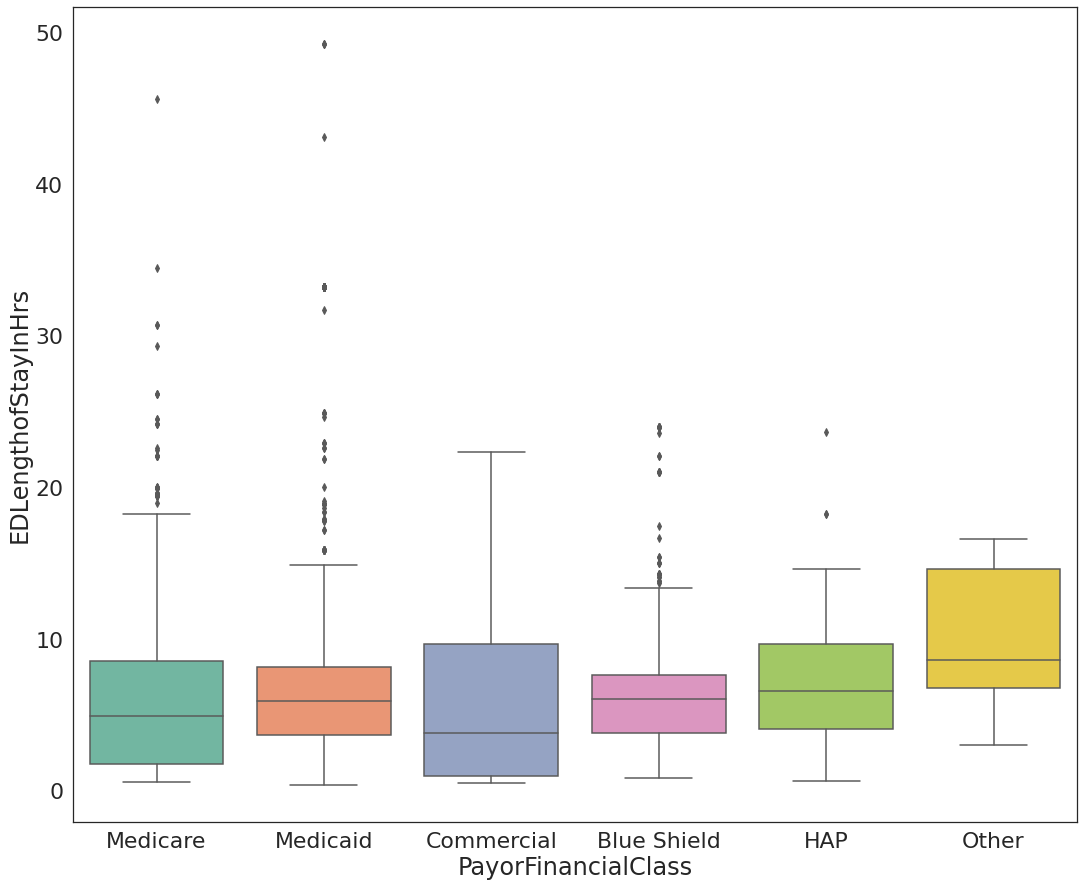

In [ ]:
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(18, 15))
ax = sns.boxplot(data=dm, x="PayorFinancialClass", y="EDLengthofStayInHrs", orient="v", palette="Set2")

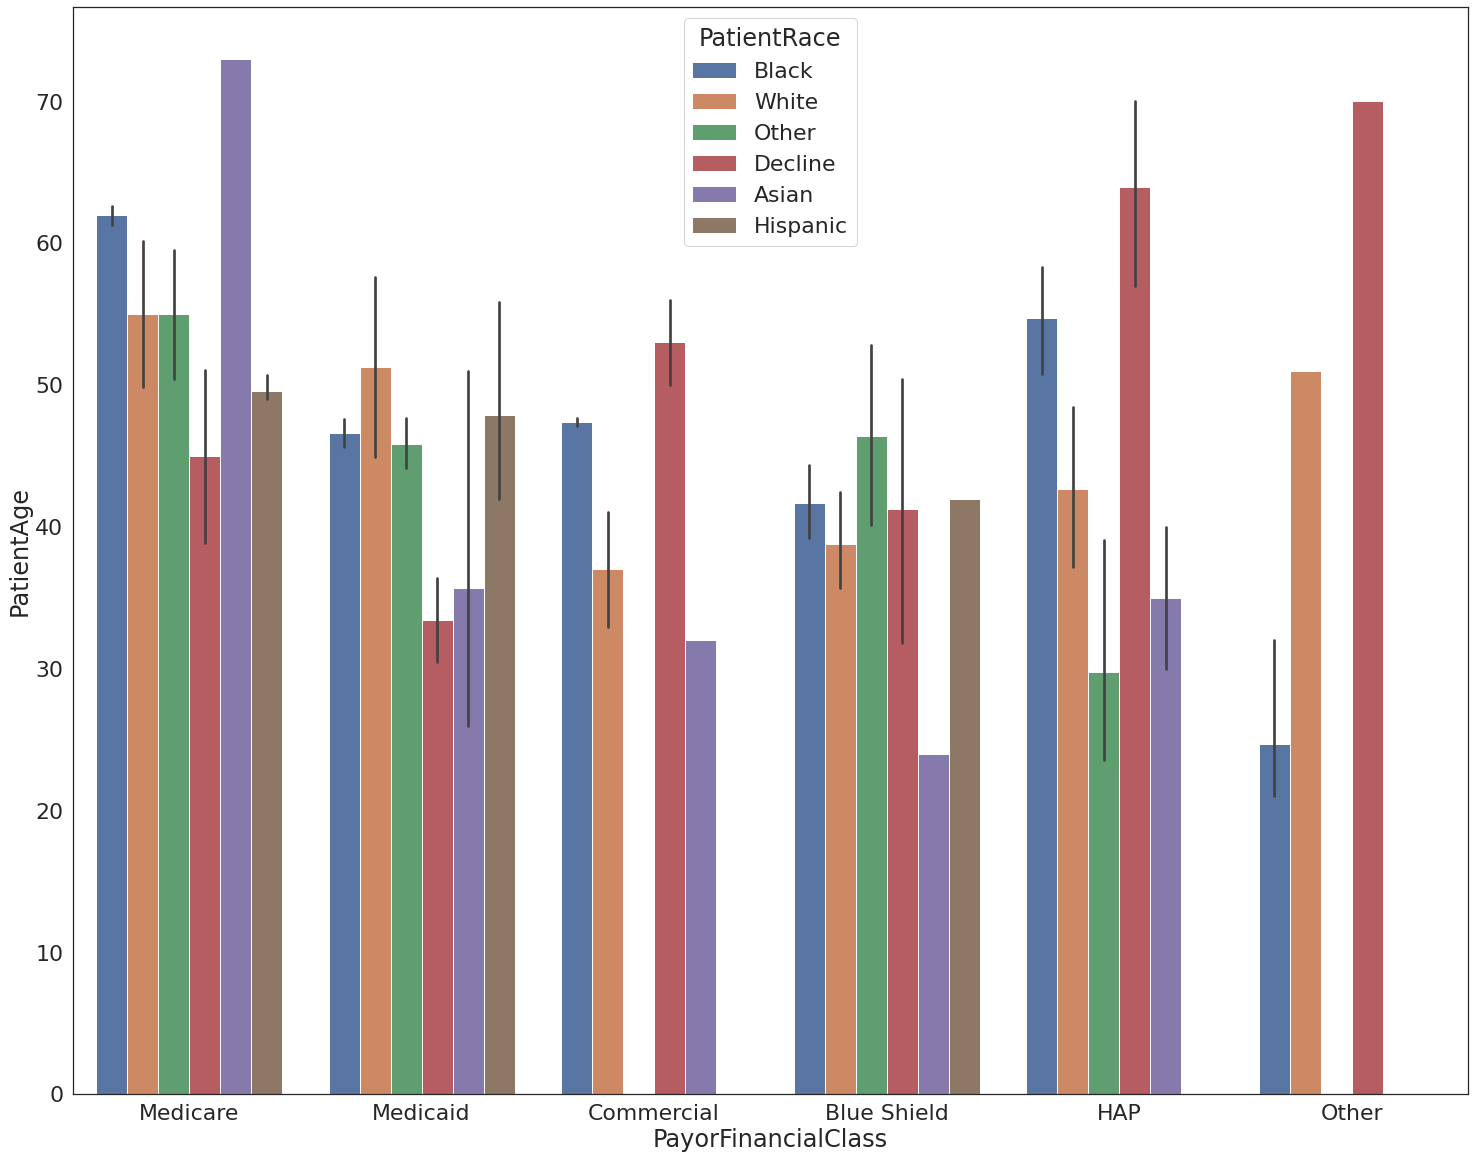

In [ ]:
# Insurance vs Age
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(25, 20))
ax = sns.barplot(x="PayorFinancialClass", y="PatientAge", hue="PatientRace", data=dm)

[Text(0, 0, '1 - Immediate'),
 Text(0, 0, '2 - Emergent'),
 Text(0, 0, '3 - Urgent'),
 Text(0, 0, '4 - Most Urgent')]

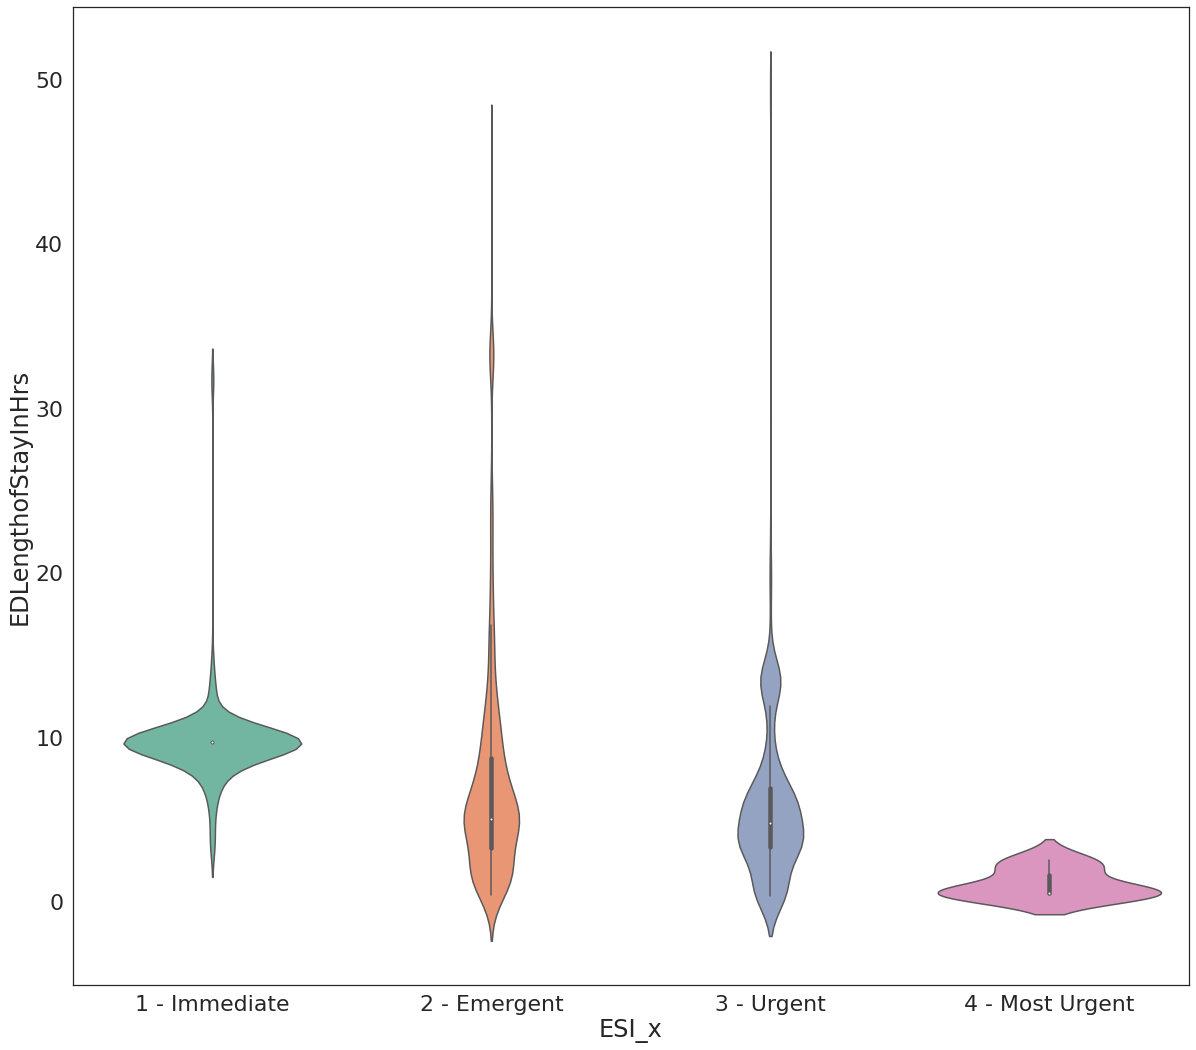

In [ ]:
# Acuity Level vs. ED LOS in Hrs
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(20, 18))
ax = sns.violinplot(data=dm, x="ESI_x", y="EDLengthofStayInHrs", palette="Set2")
ax.set_xticklabels(['1 - Immediate', '2 - Emergent', '3 - Urgent', '4 - Most Urgent'])

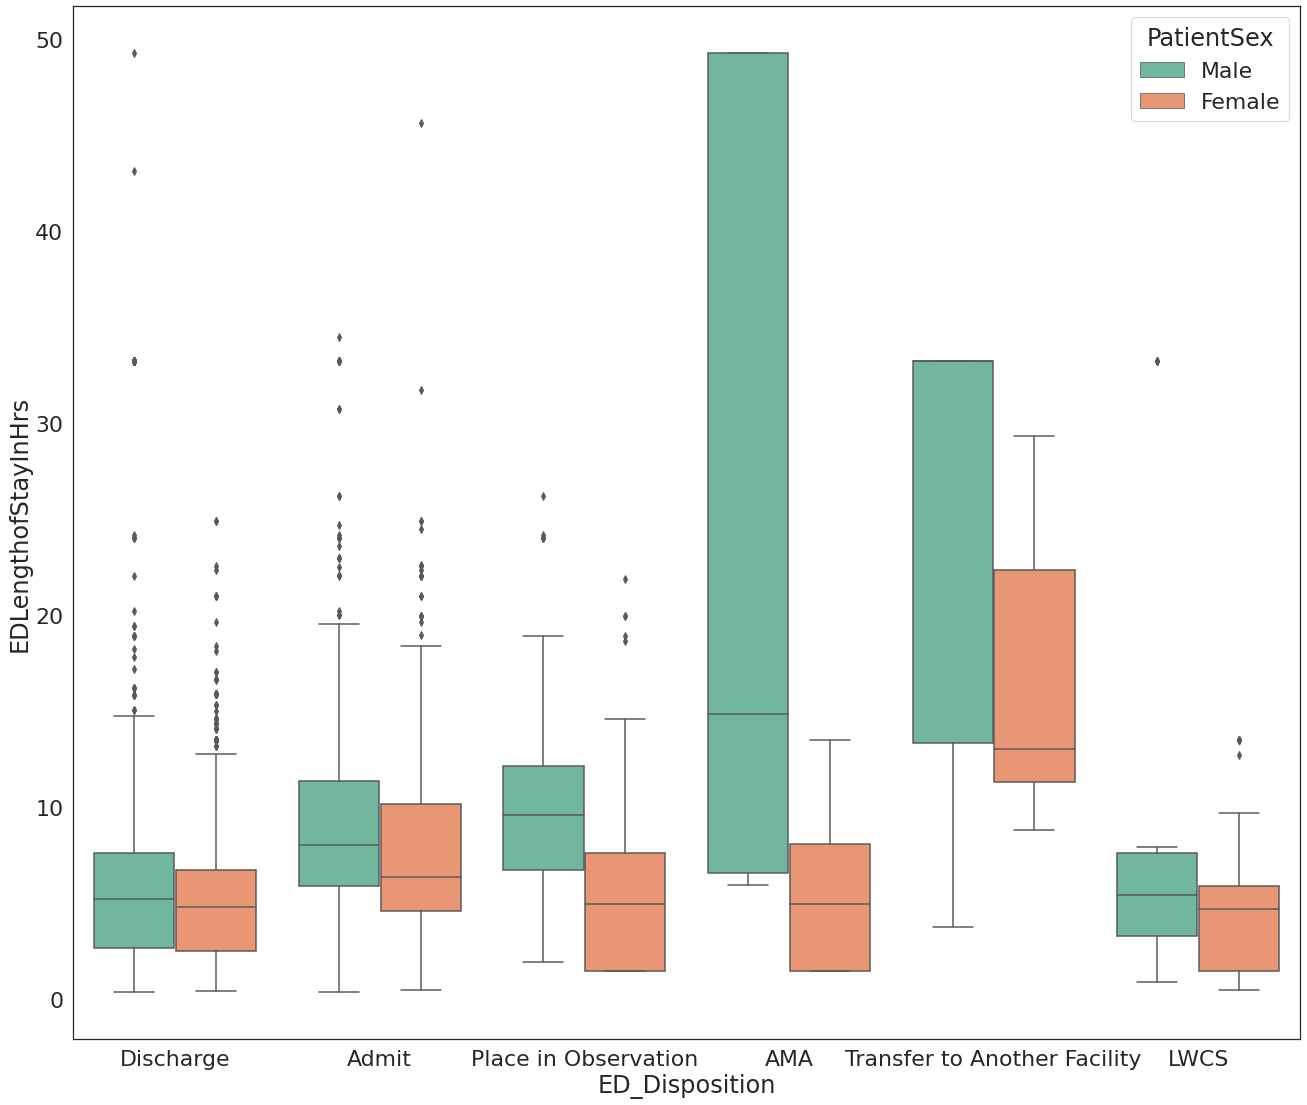

In [ ]:
# ED LOS vs ED Disposition
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(22, 19))
ax = sns.boxplot(data=dm, x="ED_Disposition", y="EDLengthofStayInHrs", hue="PatientSex", palette="Set2")

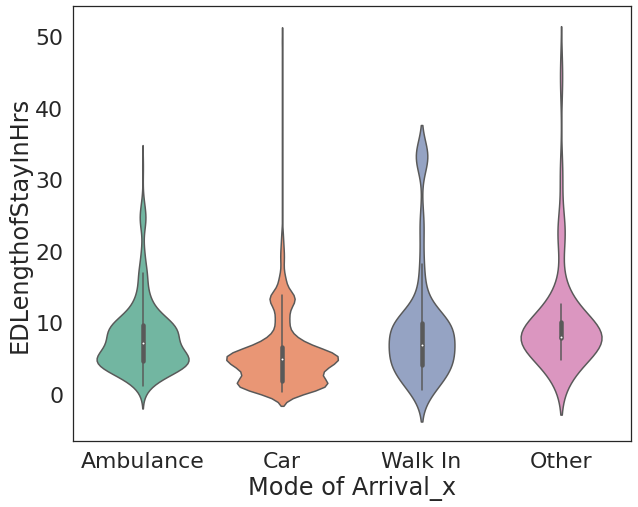

In [ ]:
# Arrival Mode vs ED LOS
sns.set(font_scale=2)
sns.set_style("white")
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.violinplot(data=dm, x="Mode of Arrival_x", y="EDLengthofStayInHrs", order=['Ambulance','Car','Walk In','Other'], palette="Set2")